In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
p = np.log([1 + 1/i for i in range(1, 10)]) / np.log(10)

# Население стран

In [ ]:
popul

array([1425326000, 1409463000,  336023460,  265275395,  227910302,
        218096540,  216826390,  179679233,  146570156,  128649565,
        124830000,  113656596,  112307222,  107757240,   98208984,
         97568312,   87696410,   86154997,   83349300,   69593975,
         68959599,   67647112,   65890747,   61956900,   59236213,
         57564296,   54045000,   51780579,   49258494,   48006700,
         47253450,   46934632,   45653000,   44938712,   41310000,
         40997699,   39225560,   39099330,   38313035,   37147170,
         36026859,   35218169,   34825000,   34471785,   33699000,
         32162184,   31418000,   31366000,   31162000,   28680342,
         28609000,   27717000,   26603000,   26348251,   25666000,
         25314743,   23782448,   22870060,   21803000,   20670565,
         20658000,   19666840,   19401658,   19256346,   18861000,
         18563749,   18036030,   17722345,   17679735,   17645000,
         17070000,   15948000,   15443000,   15288489,   12771

In [ ]:
popul2 = np.array(list(map(lambda x: int(str(x)[0]), popul)))

In [ ]:
y = [0 for i in range(1, 10)]

for el in popul2:
    y[el-1] += 1

In [ ]:
y = np.array(y)
y = y / np.sum(y)

In [ ]:
y

array([0.2892562 , 0.15702479, 0.15702479, 0.09090909, 0.08677686,
       0.08264463, 0.02892562, 0.06198347, 0.04545455])

In [ ]:
print(f'pvalue for countries population: {st.chisquare(y, p)[1]}')

pvalue for countries population: 0.9999999971636965


# Числа Фиббоначи

In [ ]:
fib = [1, 1]

for i in range(1, 100):
    fib.append(fib[i] + fib[i-1])

fib = np.array(list(map(lambda x: int(str(x)[0]), fib)))

In [ ]:
y = [0 for i in range(1, 10)]

for el in fib:
    y[el-1] += 1

y = np.array(y)
y = y / np.sum(y)

In [ ]:
print(f'pvalue for fibbonaci numbers: {st.chisquare(y, p)[1]}')

pvalue for fibbonaci numbers: 0.9999999999557907


# ВВП

In [ ]:
gdp = list(map(lambda x: str(int(float(x.replace(',','.')) * 10**9))[0], list(filter(lambda x: x != '', list(map(lambda x: x.split('\t')[1], gdp.split('\n')))))))

In [ ]:
y = [0 for i in range(1, 10)]

for el in gdp:
    y[int(el)-1] += 1

y = np.array(y)
y = y / np.sum(y)

In [ ]:
print(f'pvalue for GDP: {st.chisquare(y, p)[1]}')

pvalue for GDP: 0.9999999705883034


# Задача 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rainfall.txt')

In [ ]:
df.head()

,Rainfall
0,146.8
1,383.0
2,90.9
3,178.1
4,267.5


In [ ]:
X = df['Rainfall'].to_numpy()

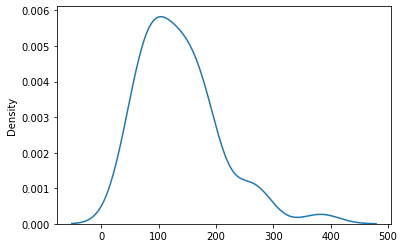

In [ ]:
sns.kdeplot(X)

In [ ]:
#Gini test

n = len(X)
G = np.array(sorted(X)).dot(np.array([2 * j - n - 1 for j in range(1, n+1)])) / (n * (n-1) * np.mean(X))

nor = np.sqrt(12 * (n - 1)) * (G - 0.5)
nor >= st.norm.ppf(0.05/2) and nor <= st.norm.isf(0.05/2)

False

Не принадлежит экпоненциальному семейству

In [ ]:
X = np.log(X)

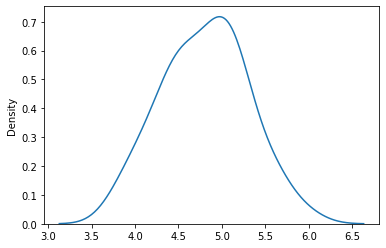

In [ ]:
sns.kdeplot(X)

In [ ]:
st.shapiro(X)

ShapiroResult(statistic=0.9857742786407471, pvalue=0.8307797908782959)

In [ ]:
st.kurtosistest(X)

KurtosistestResult(statistic=-0.5075355340776625, pvalue=0.6117791103360184)

In [ ]:
st.skewtest(X)

SkewtestResult(statistic=0.015614284926718175, pvalue=0.9875421093489123)

Значит нормальная выборка. Оценим параметры.

In [ ]:
print(f'Среднее = {np.mean(X)}\nДисперсия = {np.var(X)}')

Среднее = 4.802271854849704
Дисперсия = 0.23594147810357755


# Задача 3

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/shoshoni.txt')

In [ ]:
X = df.Ratio.to_numpy()

In [ ]:
gold = (1 + np.sqrt(5)) / 2
gold = 1/gold

In [ ]:
X.mean(), gold

(0.6605000000000001, 0.6180339887498948)

In [ ]:
X.var()

0.008130350000000001

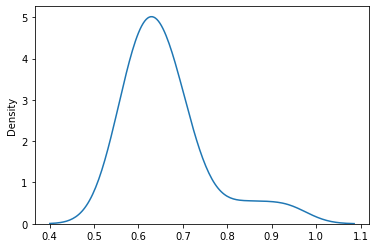

In [ ]:
sns.kdeplot(X)

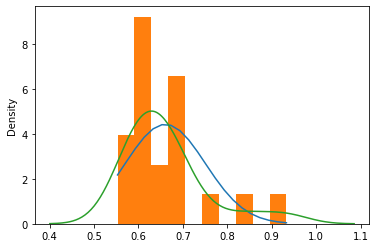

In [ ]:
# check for normal

loc, scale = st.norm.fit(X)

x = np.arange(min(X), max(X) + 1/50, 1/50)
y = st.norm.pdf(x, loc=loc, scale=scale)

plt.plot(x, y)
plt.hist(X, density=True)
sns.kdeplot(X)

In [ ]:
st.kstest(X, lambda x: st.norm.cdf(x, loc=loc, scale=scale))

KstestResult(statistic=0.2092603749977089, pvalue=0.3013843061481455)

In [ ]:
st.kstest(X, lambda x: st.norm.cdf(x, loc=gold, scale=scale))

KstestResult(statistic=0.2750805209401356, pvalue=0.07899677084464274)

In [ ]:
st.ttest_ind(X, st.norm.rvs(size=len(X), loc=gold, scale=scale))

Ttest_indResult(statistic=2.1608259109141046, pvalue=0.03707773841531438)

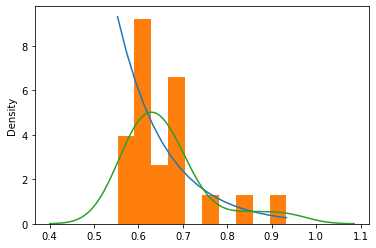

In [ ]:
# check for exponential

loc, scale = st.expon.fit(X)

x = np.arange(min(X), max(X) + 1/50, 1/50)
y = st.expon.pdf(x, loc=loc, scale=scale)

plt.plot(x, y)
plt.hist(X, density=True)
sns.kdeplot(X)

In [ ]:
st.kstest(X, lambda x: st.expon.cdf(x, loc=loc, scale=scale))

KstestResult(statistic=0.21014368004777115, pvalue=0.29677167286320794)

In [ ]:
scale = gold-loc

st.kstest(X, lambda x: st.expon.cdf(x, loc=loc, scale=scale))

KstestResult(statistic=0.37196704047893403, pvalue=0.005428558127351768)

In [ ]:
st.ttest_ind(X, st.expon.rvs(size=len(X), loc=loc, scale=scale))

Ttest_indResult(statistic=2.212695327417708, pvalue=0.03300057634149233)

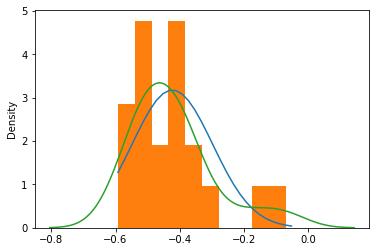

In [ ]:
# check for lognorm

X = np.log(X)

loc, scale = st.norm.fit(X)

x = np.arange(min(X), max(X) + 1/50, 1/50)
y = st.norm.pdf(x, loc=loc, scale=scale)

plt.plot(x, y)
plt.hist(X, density=True)
sns.kdeplot(X)

In [ ]:
st.kstest(X, lambda x: st.norm.cdf(x, loc=loc, scale=scale))

KstestResult(statistic=0.17669326444872102, pvalue=0.5046155526841778)

In [ ]:
st.kstest(X, lambda x: st.norm.cdf(x, loc=gold, scale=scale))

KstestResult(statistic=0.9999999785657144, pvalue=8.379348358939494e-154)

In [ ]:
st.ttest_ind(X, st.norm.rvs(size=len(X), loc=gold, scale=scale))

Ttest_indResult(statistic=-26.787272260000243, pvalue=2.809467841195679e-26)